<a href="https://colab.research.google.com/github/Gratisfo/Parentents-and-children/blob/main/morphological_frequancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frequancy Part of speech in children and parent' replicas

In [ ]:
!pip install pymorphy2[fast]

In [ ]:
!pip install razdel

In [ ]:
from pymorphy2 import MorphAnalyzer
import re
import nltk
from razdel import sentenize, tokenize
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

## Data

In [23]:
data = pd.read_csv('data.csv')
data

,speaker,text,role,date,title
0,#taratora,"И ты еще, мошенник, смеешь мне указывать! Да з...",parent,1788,krylov-prokazniki
1,#taratora,То есть чего-нибудь хорошенького.,parent,1788,krylov-prokazniki
2,#taratora,"Как, бездельник! да разве не для того он сюда ...",parent,1788,krylov-prokazniki
3,#taratora,"Да его ль вина, бестия, что вы все здесь ходит...",parent,1788,krylov-prokazniki
4,#taratora,Я окончала!.. Как я рада! Элегия эта беспример...,parent,1788,krylov-prokazniki
...,...,...,...,...,...
20297,#sineus,"Ты, сказывают, хотел Славян и прочие народы от...",children,1786,ekaterina-vtoraja-iz-zhizni-rjurika
20298,#truvor,Какие же ты имел при том намерения?,children,1786,ekaterina-vtoraja-iz-zhizni-rjurika
20299,#oskold,"К чему прение тут, где дело само по себе ясно?",children,1786,ekaterina-vtoraja-iz-zhizni-rjurika
20300,#rjurik,"Бодрость духа твоего, князь Вадим, не унывает;...",parent,1786,ekaterina-vtoraja-iz-zhizni-rjurika


## Preprocessing data

In [37]:
morph = MorphAnalyzer()
def preproc_text(text):
    # токенизируем
    tokens = [_.text for _ in list(tokenize(text))]
    
    # приводим к нижнему регистру
    tokens = [w.lower() for w in tokens]
    
    # убираем пунктуацию
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # убираем числа и оставлем только кирилицу
    words = [word for word in stripped if word.isalpha()]
    text = " ".join(words)
  
    # приводим к начальной форме
    lemmas = [morph.parse(w)[0].normal_form for w in words] 
    pos = [morph.parse(w)[0].tag.POS for w in words]
    return text, lemmas, pos

## Bulding POS dictionaries

In [49]:
def build_pos_dict(texts):
    text = ' '.join(texts)
    text, lemmas, poses = preproc_text(text)
    pos_dict = {"ADJ": 0, "ADVB": 0, "INTJ": 0, "NOUN": 0, "PREP": 0, "VERB": 0}
    pos_dict_lemmas = {"ADJ": [], "ADVB": [], "INTJ": [], "NOUN": [], "PREP": [], "VERB": []}
    for pos, lemma in zip(poses, lemmas):

      if pos in set(["ADJF", "ADJS", "COMP"]):
        pos_dict_lemmas["ADJ"].append(lemma)
        pos_dict["ADJ"] += 1
      elif pos in set(["VERB", "INFN"]):
        pos_dict_lemmas["VERB"].append(lemma)
        pos_dict["VERB"] += 1
      elif pos in pos_dict.keys():
        pos_dict_lemmas[pos].append(lemma)
        pos_dict[pos] += 1

    return dict(sorted(pos_dict.items(), key=lambda kv: kv[1], reverse=True)), pos_dict_lemmas

## Parents' texts

In [ ]:
parent_corp = list(data[data['role']=='parent'].text)
pos_dict_p, pos_dict_lemmas_p = build_pos_dict(parent_corp)
print(pos_dict_p, '\n', pos_dict_lemmas_p)

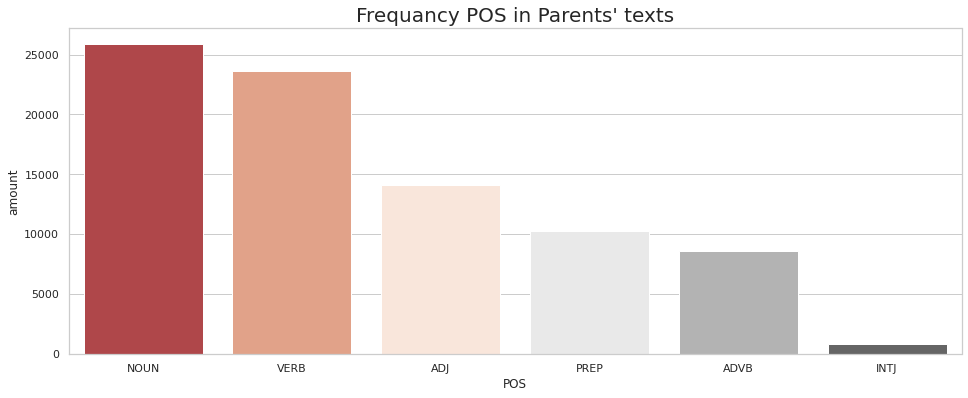

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

df_p = pd.DataFrame(pos_dict_p.items())
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=0, y=1, data=df_p,  palette=("RdGy"))
ax.set(xlabel = 'POS', ylabel='amount')
ax.set_title('Frequancy POS in Parents\' texts', fontsize=20)
plt.show()

### NOUN

дело : 538
человек : 517
бог : 345
деньга : 234
друг : 229
дочь : 220
сын : 202
батюшка : 196
жена : 191
дом : 187




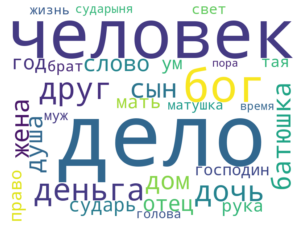

In [153]:
c = Counter()
c.update(pos_dict_parents['NOUN'])
nouns = dict(c.most_common(30))
for n in list(nouns.keys())[:10]:
  print(n, ':', nouns[n])

print('\n')

#Visualisation WORD CLOUD
wordcloud = WordCloud(background_color='white',
                      width=800,height=600,             
                      relative_scaling=1).generate_from_frequencies(nouns)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### VERB

быть : 1416
говорить : 775
знать : 695
сказать : 523
мочь : 475
хотеть : 461
видеть : 346
думать : 275
есть : 250
пойти : 235




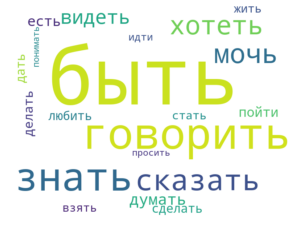

In [154]:
c = Counter()
c.update(pos_dict_parents['VERB'])
verbs = dict(c.most_common(20))
for v in list(verbs.keys())[:10]:
  print(v, ':', verbs[v])

print('\n')

#Visualisation WORD CLOUD
wordcloud = WordCloud(background_color='white',
                      width=800,height=600,             
                      relative_scaling=1).generate_from_frequencies(verbs)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### ADJ

каков : 58
живой : 58
чужой : 59
первый : 61
виноватый : 62
самый : 64
милый : 65
богатый : 66
добрый : 80
надобный : 97




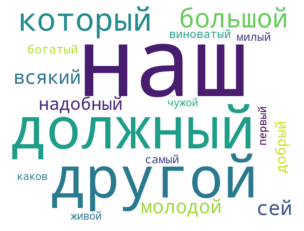

In [155]:
c = Counter()
c.update(pos_dict_parents['ADJ'])
adj = dict(c.most_common(30))
list_adj = list(adj.items())
list_adj.sort(key=lambda i: i[1])
adj = dict(list_adj[:-12])

for a in list(adj.keys())[:10]:
  print(a, ':', adj[a])

print('\n')

#Visualisation WORD CLOUD
wordcloud = WordCloud(background_color='white',
                      width=800,height=600,             
                      relative_scaling=1).generate_from_frequencies(adj)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### ADVB

уж : 636
ещё : 498
только : 419
теперь : 402
ничего : 280
где : 244
тут : 235
очень : 231
здесь : 209
там : 184




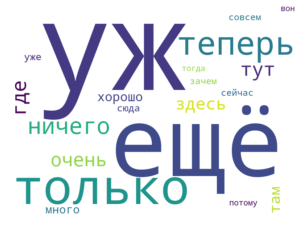

In [156]:
c = Counter()
c.update(pos_dict_parents['ADVB'])
advb = dict(c.most_common(20))

for a in list(advb.keys())[:10]:
  print(a, ':', advb[a])

print('\n')

#Visualisation WORD CLOUD
wordcloud = WordCloud(background_color='white',
                      width=800,height=600,             
                      relative_scaling=1).generate_from_frequencies(advb)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### PREP

In [158]:
c = Counter()
c.update(pos_dict_parents['PREP'])
prep = dict(c.most_common(20))

for p in list(prep.keys())[:10]:
  print(p, ':', prep[p])

print('\n')

в : 2078
с : 1497
на : 1283
у : 895
за : 777
о : 612
к : 573
по : 388
от : 388
из : 292




## Chidlrens' texts

In [87]:
children_corp = list(data[data['role']=='children'].text)
pos_dict_ch, pos_dict_lemmas_ch = build_pos_dict(children_corp)
print(pos_dict_ch, '\n', pos_dict_lemmas_ch)

{'VERB': 17434, 'NOUN': 16612, 'ADJ': 9241, 'PREP': 6840, 'ADVB': 6350, 'INTJ': 551} 
 {'ADJ': ['твой', 'сердитый', 'несчастливый', 'хороший', 'сам', 'несчастливый', 'несчастливый', 'счастливый', 'свой', 'сей', 'скучный', 'который', 'сам', 'который', 'здешний', 'весь', 'весь', 'свой', 'тот', 'угодный', 'мой', 'один', 'дерзкий', 'должный', 'какой', 'честный', 'твой', 'наш', 'ваш', 'наш', 'послушный', 'сей', 'дивный', 'горестный', 'тот', 'твой', 'пустой', 'тот', 'большой', 'мой', 'тот', 'мой', 'твой', 'твой', 'любезный', 'несчастный', 'вспламенный', 'нестерпимый', 'твой', 'весь', 'такой', 'твой', 'свой', 'несчастный', 'мой', 'чужой', 'сей', 'смертный', 'жестокий', 'невозможный', 'мой', 'твой', 'несходный', 'сей', 'большой', 'свой', 'лютый', 'вечный', 'свой', 'свой', 'сей', 'свой', 'нестерпимый', 'родительский', 'родительский', 'мой', 'жестокий', 'драгой', 'мой', 'добродетельный', 'сам', 'какой', 'дражайший', 'милый', 'бедный', 'жестокий', 'близкий', 'тошный', 'такой', 'злой', 'царский', 

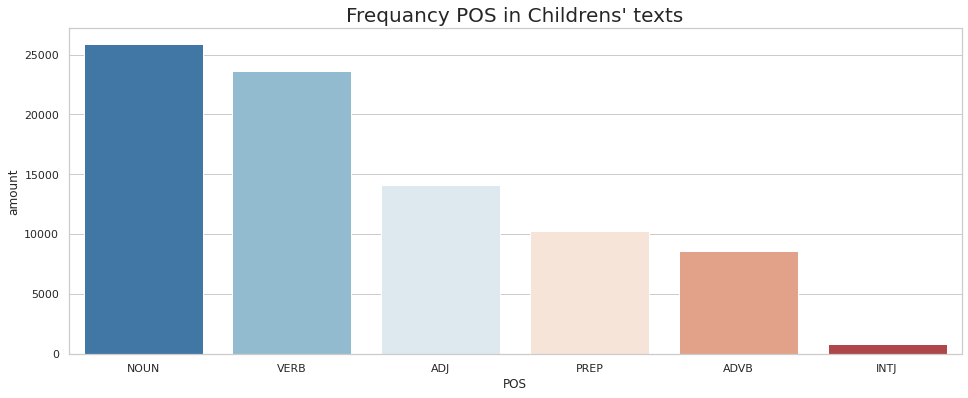

In [90]:
df_ch = pd.DataFrame(pos_dict_ch.items())
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=0, y=1, data=df_p,  palette=("RdBu_r"))
ax.set(xlabel = 'POS', ylabel='amount')
ax.set_title('Frequancy POS in Childrens\' texts', fontsize=20)
plt.show()

### NOUN

человек : 305
маменька : 273
дело : 208
бог : 182
отец : 152
жизнь : 147
деньга : 144
батюшка : 137
любовь : 126
слово : 119




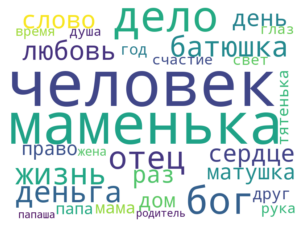

In [160]:
c = Counter()
c.update(pos_dict_childrens['NOUN'])
nouns = dict(c.most_common(30))
for n in list(nouns.keys())[:10]:
  print(n, ':', nouns[n])

print('\n')

#Visualisation WORD CLOUD
wordcloud = WordCloud(background_color='white',
                      width=800,height=600,             
                      relative_scaling=1).generate_from_frequencies(nouns)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### VERB

быть : 1169
говорить : 623
знать : 578
мочь : 530
сказать : 383
хотеть : 364
любить : 363
видеть : 229
думать : 210
пойти : 186




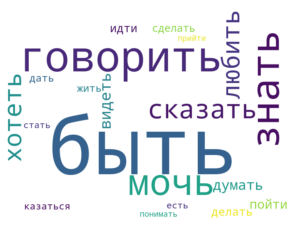

In [161]:
c = Counter()
c.update(pos_dict_childrens['VERB'])
verbs = dict(c.most_common(20))
for v in list(verbs.keys())[:10]:
  print(v, ':', verbs[v])

print('\n')

#Visualisation WORD CLOUD
wordcloud = WordCloud(background_color='white',
                      width=800,height=600,             
                      relative_scaling=1).generate_from_frequencies(verbs)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### ADJ

молодой : 42
новый : 46
никакой : 46
угодный : 49
добрый : 51
милый : 53
первый : 53
самый : 54
виноватый : 58
всякий : 59




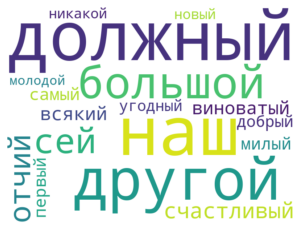

In [163]:
c = Counter()
c.update(pos_dict_childrens['ADJ'])
adj = dict(c.most_common(30))
list_adj = list(adj.items())
list_adj.sort(key=lambda i: i[1])
adj = dict(list_adj[:-13])

for a in list(adj.keys())[:10]:
  print(a, ':', adj[a])

print('\n')

#Visualisation WORD CLOUD
wordcloud = WordCloud(background_color='white',
                      width=800,height=600,             
                      relative_scaling=1).generate_from_frequencies(adj)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### ADVB

только : 394
уж : 324
теперь : 319
ещё : 261
ничего : 229
очень : 217
здесь : 158
зачем : 141
там : 131
где : 126




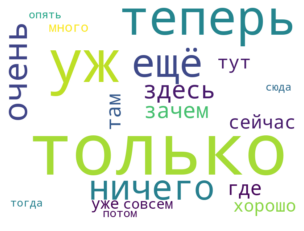

In [164]:
c = Counter()
c.update(pos_dict_childrens['ADVB'])
advb = dict(c.most_common(20))

for a in list(advb.keys())[:10]:
  print(a, ':', advb[a])

print('\n')

#Visualisation WORD CLOUD
wordcloud = WordCloud(background_color='white',
                      width=800,height=600,             
                      relative_scaling=1).generate_from_frequencies(advb)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### PREP

In [165]:
c = Counter()
c.update(pos_dict_childrens['PREP'])
prep = dict(c.most_common(20))

for p in list(prep.keys())[:10]:
  print(p, ':', prep[p])

print('\n')

в : 1424
с : 950
на : 838
у : 527
за : 507
о : 434
к : 430
от : 289
для : 262
по : 223


